### Exercise 2:   Sampling from Discrete & Continuous Distributions

In [262]:
# imports

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare, kstest
from math import log, floor
from collections import Counter
import random 

Functions for testing:

In [263]:
# Code for performing distribution/correlation tests

def gen_ecdf(numbers):
    x = np.sort(numbers)
    n = len(x)
    y = np.arange(1, n+1) / n
    return(x,y)

def make_histograms(gen_dist, expected_dist):
    width = 0.8

    indices = [1,2,3,4,5,6]

    plt.bar(indices, expected_dist, width=width, 
            color='b', label='Given Distribution')
    plt.bar([i+0.25*width for i in indices], gen_dist, 
            width=0.5*width, color='r', alpha=0.5, label='Generated Distribution')

    plt.legend()

    plt.show()


def run_test_1(numbers):

    median = np.median(np.array(numbers))
    n_1 = len([i for i in numbers if i > median])
    n_2 = len([i for i in numbers if i < median])

    runs_expected = 2*n_1*n_2/(n_1+n_2) + 1 # Mean


    numerator = 2*n_1*n_2*(2*n_1*n_2-n_1-n_2)
    denominator = ((n_1+n_2)**2)*(n_1+n_2+1)

    s_R = np.sqrt(numerator/denominator) # Variance

    # calculating number of runs

    num_runs = 0
    prev_val = ""
    if numbers[0]>median: prev_val = "above"
    else: prev_val = "below"


    for i in numbers[1:]:
        if prev_val == "above" and i < median: 
            num_runs += 1
            prev_val = "below"
        elif prev_val == "below" and i > median:
            num_runs += 1
            prev_val = "above"

    Z = abs((num_runs-runs_expected)/s_R)

    return Z


def run_test_2(numbers):
    R = np.zeros(shape=6, dtype=np.int32)
    current_run = 1
    for i in range(1, len(numbers)):
        if numbers[i] < numbers[i-1]:
            if current_run >= 6:
                R[-1] += 1
            else:
                R[current_run-1] += 1
            current_run = 1
        else:
            current_run += 1
    
    B = np.array([1/6, 5/24, 11/120, 19/720, 29/5040, 1/840])
    A = np.array(
            [[4529.4, 9044.9, 13568, 18091, 22615, 27892],
             [9044.9, 18097, 27139, 36187, 45234, 55789], 
             [13568, 27139, 40721, 54281, 67852, 83685], 
             [18091, 36187, 54281, 72414, 90470, 111580], 
             [22615, 45234, 67852, 90470, 113262, 139476], 
             [27892, 55789, 83685, 111580, 139476, 172860]], dtype=float)
    n = len(numbers)
    Z1 = np.transpose((R-n*B))
    Z1 = np.matmul(Z1, A)
    Z2 = (R-n*B)
    Z = (1/(n-6))*np.matmul(Z1, Z2)

    return Z

def run_test_3(numbers):
    # converting 
    new_lst = []
    for i in range(len(numbers)-1):
        if numbers[i] < numbers[i+1]:
            new_lst.append("<")
        else:
            new_lst.append(">")
    
    # counting total runs
    X = 0
    for i in range(len(new_lst)-1):
        if new_lst[i] != new_lst[i+1]:
            X+=1
        
    n = len(numbers)

    Z = (X-(2*n-1)/3)/np.sqrt((16*n-29)/90)

    return Z

def auto_corr(X, h):
    s = 0
    n = len(X)

    # Distribution has to be ~ U(0,1)
    m = max(X)
    U = [i/m for i in X]

    for i in range(n-h):
        s += U[i]*U[i+h]
    return s/(n-h)


def test(X, pdf, raw_sample):
    """
    X - Frequency distribution
    pdf - six point distriubtion
    raws_sample - random sample generated (list of 10000)
    """
    pdf_gen = [float(i/sum(X)) for i in X] # sum(X) = total number of observations
    
    print("----- Probability Distributions -----")
    print(f"Generated pdf: {pdf_gen}")
    print(f"Expected pdf: {pdf}\n")
    
    chisq, p = chisquare(X, f_exp=[i*sum(X) for i in pdf])
    
    print(r"----- Performing chi-squared test (alpha = 5%) -----")
    print(f"Test statistic: {chisq}")
    print(f"P-value: {p}\n")

    print(r"----- Performing Kolmogorov-Smirnov test (alpha = 5%) -----")

    cdf = np.cumsum(pdf) # F(x) = P(X≤x)
    
    X_ecdf = np.cumsum(X)/sum(X)
    
    print(f"Generated ECDF: {X_ecdf}")
    print(f"CDF: {cdf}")

    res = kstest(X_ecdf, cdf)
    print(f"Test statistic: {res.statistic}")
    print(f"P-value: {res.pvalue}\n")
    plt.scatter([1,2,3,4,5,6], X_ecdf, label="ECDF",marker="x", color="b")
    plt.scatter([1,2,3,4,5,6], cdf, label="CDF", marker="x", color="r")
    plt.legend()
    plt.ylabel(r"$P(X \leq x)$")
    plt.xlabel(r"$x$")
    plt.grid()
    plt.title("KS-test")
    plt.show()

    

    print(r"----- Performing Run Tests -----")
    print(f"I: {run_test_1(raw_sample)}")
    print(f"II: {run_test_2(raw_sample)}")
    print(f"III: {run_test_3(raw_sample)}\n")

    print("----- Correlation Test -----")
    print(auto_corr(raw_sample, 1))
    


    print("----- Visual Comparison between PDFs -----")
    make_histograms(pdf_gen, pdf)


In [264]:
def make_freq_dist(X, keys=[1,2,3,4,5,6]):
    
    freq = []

    for i in keys:
    
        freq.append(X.count(i))

    return freq

**1. Choose a value for the probability parameter p in the geometric distribution and simulate 10,000 outcomes. You can experiment with a small, moderate and large value if you like.**

In [265]:
def geometric_dist(U, p):
    return [floor(log(i)/log(1-p))+1 for i in U]

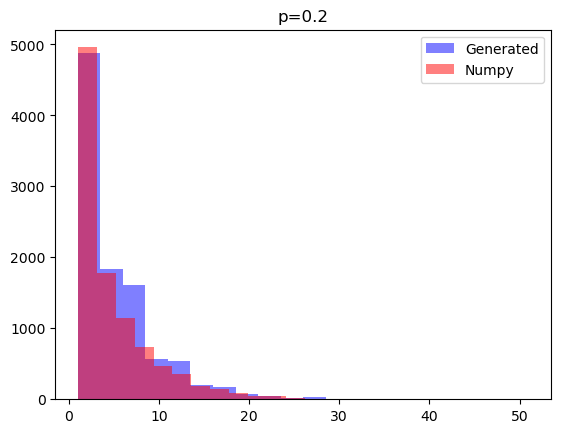

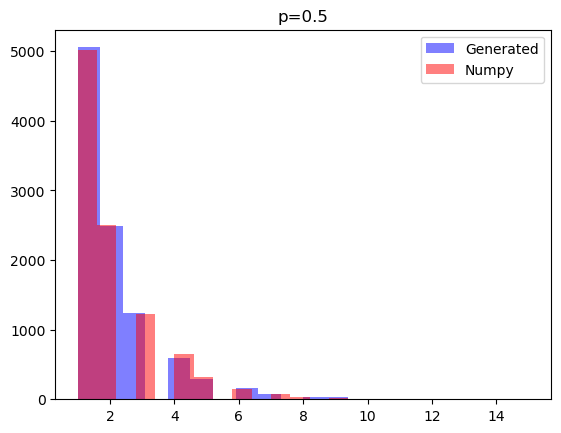

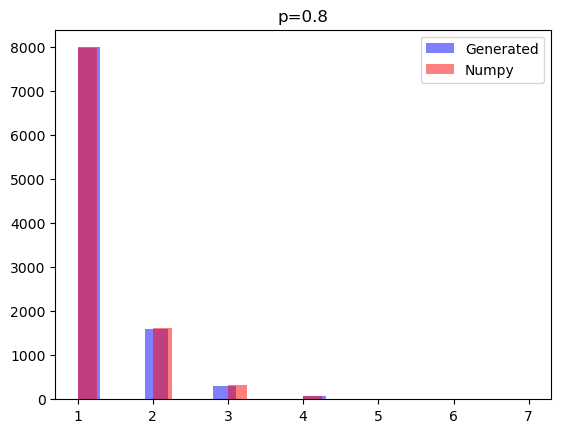

In [266]:
ps = [0.2, 0.5, 0.8]


for p in ps:
    
    U = np.random.uniform(size=10000)
    
    g_d, g_d_ref = geometric_dist(U, p), np.random.geometric(p=p, size = 10000)
    
    plt.hist(g_d, bins=20, color="b", label="Generated",alpha=0.5)
    plt.hist(g_d_ref, bins=20, color="r", label="Numpy",alpha=0.5)
    plt.title(f"p={p}")

    plt.legend()

    plt.show()
    
    



**2. Simulate the 6 point distribution**

| $X$  |  1 | 2  | 3  | 4  |5   | 6  |
|---|---|---|---|---|---|---|
| $p_i$  | 7/48  | 5/48  | 1/8  | 1/16  | 1/4  | 5/16  |

In [267]:

# 6-point distribution

dist_6pt = [7/48, 5/48, 1/8, 1/16, 1/4, 5/16]

**(a) by applying a direct (crude) method**

In [268]:
# Helper function for crude method of discrete random sampling

def insert_into_categories(values, intervals):
    
    discrete_sample = []

    for value in values:
        for i, interval in enumerate(intervals): # Linear search    
            if interval[0] < value and value <= interval[1]:
    
                discrete_sample.append(i+1)
    
    return discrete_sample

def crude_method(pdf, size):    
    
    U = np.random.uniform(size=size)
    cdf = np.cumsum(pdf)
    intervals = [(0, cdf[0])]+[(cdf[i-1], cdf[i]) for i in range(1, len(cdf))]
    
    return insert_into_categories(U, intervals)

Generating sample and testing

----- Direct/Crude Method -----

----- Probability Distributions -----
Generated pdf: [0.1511, 0.0986, 0.1251, 0.0564, 0.2539, 0.3149]
Expected pdf: [0.14583333333333334, 0.10416666666666667, 0.125, 0.0625, 0.25, 0.3125]

----- Performing chi-squared test (alpha = 5%) -----
Test statistic: 11.62396571428571
P-value: 0.04031987254626759

----- Performing Kolmogorov-Smirnov test (alpha = 5%) -----
Generated ECDF: [0.1511 0.2497 0.3748 0.4312 0.6851 1.    ]
CDF: [0.14583333 0.25       0.375      0.4375     0.6875     1.        ]
Test statistic: 0.16666666666666666
P-value: 0.9999999999999998



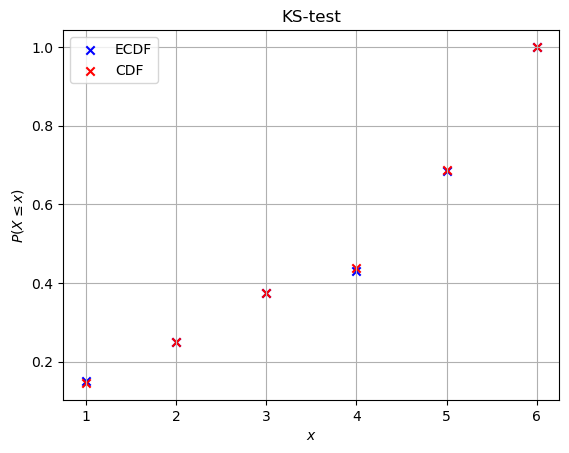

----- Performing Run Tests -----
I: 1.166436558977759
II: 2731.647693745814
III: -6.981360649301707

----- Correlation Test -----
0.4668994677245444
----- Visual Comparison between PDFs -----


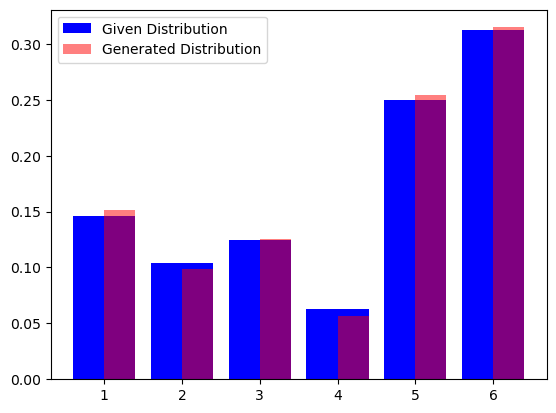

In [269]:
print("----- Direct/Crude Method -----\n")

crude_sample = crude_method(dist_6pt, 10000)

test(make_freq_dist(crude_sample), dist_6pt, crude_sample)

**(b) by using the the rejction method**

In [270]:
def accept_reject_method(pdf, size, k, c=1):
    
    X = []
    
    while len(X) < size:
    
        U1, U2 = np.random.uniform(), np.random.uniform()
        I = floor(k*U1)+1
        p_I = pdf[int(I)-1]
        if U2 <= p_I/c: X.append(I)
    
    
    return X

----- Accept/Reject Method -----

----- Probability Distributions -----
Generated pdf: [0.1434, 0.0974, 0.1277, 0.0699, 0.2541, 0.3075]
Expected pdf: [0.14583333333333334, 0.10416666666666667, 0.125, 0.0625, 0.25, 0.3125]

----- Performing chi-squared test (alpha = 5%) -----
Test statistic: 15.61884571428573
P-value: 0.008020884780821106

----- Performing Kolmogorov-Smirnov test (alpha = 5%) -----
Generated ECDF: [0.1434 0.2408 0.3685 0.4384 0.6925 1.    ]
CDF: [0.14583333 0.25       0.375      0.4375     0.6875     1.        ]
Test statistic: 0.16666666666666666
P-value: 0.9999999999999998



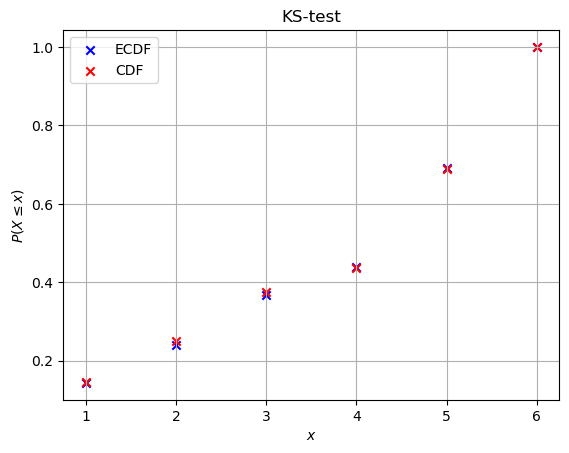

----- Performing Run Tests -----
I: 0.4693606074447775
II: 2690.8138629711875
III: -9.305845395501825

----- Correlation Test -----
0.4721972197219668
----- Visual Comparison between PDFs -----


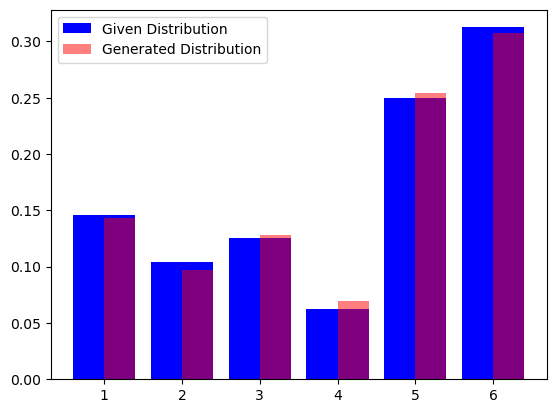

In [271]:
ar_sample = accept_reject_method(dist_6pt, 10000, len(dist_6pt))
print("----- Accept/Reject Method -----\n")
test(make_freq_dist(ar_sample), dist_6pt, ar_sample)

**(c) by using the Alias method**

In [272]:
def gen_tables(pdf, k=6):
    
    L = [i for i in range(1, k+1)] # Categories
    F = [k*i for i in pdf]

    G = [i for i in range(len(F)) if F[i] >= 1]
    S = [i for i in range(len(F)) if i <= 1]
    
    while len(S) != 0:
       
        i = G[0]
        j = S[0]
       
        L[j] = i
        F[i] = F[i] - (1 - F[j])
       
        if F[i] < 1:
       
            G = G[1:]
            S.append(i)
       
        S = S[1:]
    
    return F, L

def alias_method(pdf, size, k=6):
    F, L = gen_tables(pdf)
    X = []
    while len(X) < size:
    
        U1, U2 = np.random.uniform(), np.random.uniform()
        I = floor(k*U1)+1

        if U2 <= F[int(I)-1]: X.append(I)
        else: X.append(L[int(I)-1])
    return X

----- Alias Method -----

----- Probability Distributions -----
Generated pdf: [0.1485, 0.101, 0.1662, 0.2484, 0.172, 0.1639]
Expected pdf: [0.14583333333333334, 0.10416666666666667, 0.125, 0.0625, 0.25, 0.3125]

----- Performing chi-squared test (alpha = 5%) -----
Test statistic: 6616.637805714286
P-value: 0.0

----- Performing Kolmogorov-Smirnov test (alpha = 5%) -----
Generated ECDF: [0.1485 0.2495 0.4157 0.6641 0.8361 1.    ]
CDF: [0.14583333 0.25       0.375      0.4375     0.6875     1.        ]
Test statistic: 0.16666666666666666
P-value: 0.9999999999999998



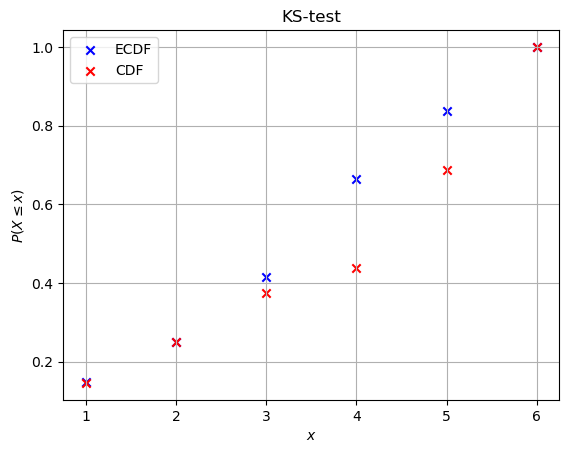

----- Performing Run Tests -----
I: 0.0784880266105628
II: 1623.9491158688486
III: -5.24985670570366

----- Correlation Test -----
0.37724605793913274
----- Visual Comparison between PDFs -----


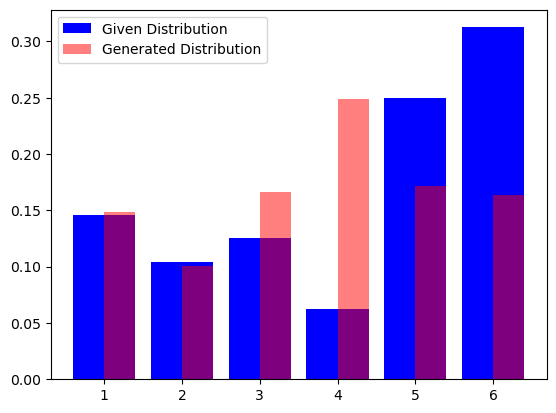

In [273]:
alias_sample = alias_method(dist_6pt, 10000)

print("----- Alias Method -----\n")
test(make_freq_dist(alias_sample), dist_6pt, alias_sample)

**3. Compare the three different methods using adequate criteria, then discuss the results.**

Results for each test:


| Method  |  Kolmogorov-smirnov (p-value) | $\chi^2$ (p-value) | Run Test 1  | Run Test 2  | Run Test 3   | Correlation test  |
|---|---|---|---|---|---|---|
| Crude/Direct  | 1  | 0.593  | 0.142  | 2614.968  | -9.780 | 0.468  |
| Rejection  | 1  | 0.362  | 0.363  | 2786.821  | -8.238 | 0.460  |
| Alias  | 1  | 0.0  | 0.355  | 1659.929  | -4.704  | 0.381  |


**4. Give recommendations of how to choose the best suited method in different settings, i.e., discuss the advantages and drawbacks of each method. If time permits substantiate by running experiments.**